<a href="https://www.kaggle.com/code/risakashiwabara/eda-scatterplot?scriptVersionId=158167942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">Sample data acquisition　</p>

In [2]:
prompts_train = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv')
prompts_test = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv')
summaries_test = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv')
#jon_average
summaries_train = pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv')
summaries_train['Average'] = summaries_train.mean(axis=1)
summaries_train

/tmp/ipykernel_21/1312822050.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summaries_train['Average'] = summaries_train.mean(axis=1)


,student_id,prompt_id,text,content,wording,Average
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,0.293110
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,-0.020774
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,3.680077
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,-0.341014
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,3.246325
...,...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538,0.293110
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,-0.130138
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603,-0.950892
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128,0.116909


In [3]:
newdata = pd.merge(summaries_train,prompts_train , left_on='prompt_id', right_on='prompt_id')
newdata

,student_id,prompt_id,text,content,wording,Average,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,0.293110,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,3.246325,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,0.293110,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,0.768519,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,-0.496183,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,-1.265083,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,-1.050096,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,-0.714347,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,-0.161636,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">Countdata</p>


In [4]:
a = ['student_id','prompt_id','text','content','wording']
for b in a:
    summaries_train.describe()
    summaries_train[b].unique()
    print('-----'+b+'-------')
    print(summaries_train[b].value_counts())
    
    

-----student_id-------
000e8c3c7ddb    1
a9211e196f37    1
a9ba7154832d    1
a9ba1ad23b49    1
a9b02545f465    1
               ..
54f872b66565    1
54ec1d27bae3    1
54d3b82ff5b1    1
54ce5af681b0    1
fffbccfd8a08    1
Name: student_id, Length: 7165, dtype: int64
-----prompt_id-------
39c16e    2057
3b9047    2009
ebad26    1996
814d6b    1103
Name: prompt_id, dtype: int64
-----text-------
The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader                                                                                                                                                                                                                                                                   

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">staudent×average</p>

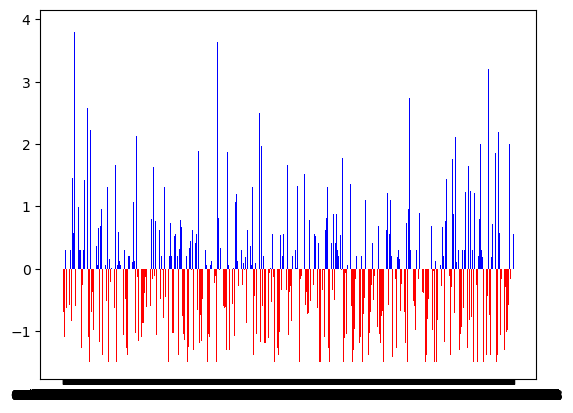

In [5]:
Y = summaries_train['Average']
X = summaries_train['student_id']
color = [('b' if i > 0 else 'r') for i in Y]

fig, ax = plt.subplots()
ax.bar(X, Y, color=color)

fig.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">wording×content</p>

Plot targets:


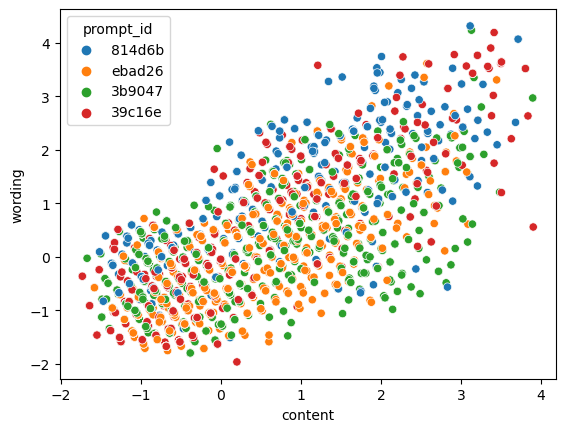

In [6]:
print('Plot targets:')
sns.scatterplot(x =  summaries_train['content'], y =  summaries_train['wording'], hue =  summaries_train['prompt_id'] )
plt.show()

In [7]:
prompt_titledata = newdata.loc[:, ['content', 'wording', 'Average','prompt_title']]
df = prompt_titledata.groupby('prompt_title').aggregate(np.mean)
df = df.reset_index()
df


,prompt_title,content,wording,Average
0,Egyptian Social Structure,0.049579,-0.068542,-0.009481
1,Excerpt from The Jungle,-0.087906,-0.299023,-0.193465
2,On Tragedy,-0.095457,-0.140749,-0.118103
3,The Third Wave,0.150306,0.518733,0.334519


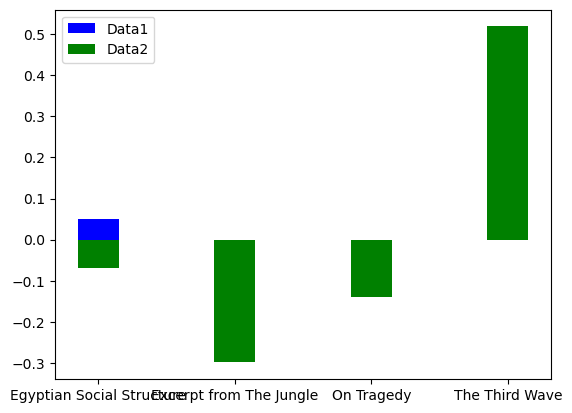

In [8]:
# 1つ目の棒グラフ
plt.bar(df['prompt_title'], df['content'], color='b', width=0.3, label='Data1', align="center")
# 2つ目の棒グラフ
plt.bar(df['prompt_title'], df['wording'], color='g', width=0.3, label='Data2', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
# plt.xticks([1.15, 2.15, 3.15], label_x)
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/1X1CS0GW/gahag-0114768440-1.jpg);font-family:Hiragino Sans;font-size:120%;color:B;text-align:center;border-radius:15px 50px; padding:7px">traindata_sort</p>

In [9]:
summaries_train = summaries_train.sort_values("prompt_id", ascending=True)
summaries_train

,student_id,prompt_id,text,content,wording,Average
2788,63bb6f3ad628,39c16e,The ideal tragedy should be complex in plot. T...,-0.974242,-0.751414,-0.862828
3592,7f47d6de3728,39c16e,first should be arranged not on a simple but o...,-0.062106,-0.380727,-0.221417
5755,ccc33ede2999,39c16e,A tragedy should have an intricate plot. There...,0.050689,0.260165,0.155427
2403,55e03b665dd2,39c16e,A tragedy should have a well-constructed plot ...,-0.981265,-1.548900,-1.265083
2404,55ec6332e88a,39c16e,One element is the Central idea because they t...,-1.049580,-1.049411,-1.049495
...,...,...,...,...,...,...
2808,64533d055256,ebad26,It was only when the whole ham was spoiled tha...,-0.382272,-1.795491,-1.088882
2802,642e49e094cc,ebad26,Workers would prepare rotten and diseased meat...,0.173745,-1.173667,-0.499961
2801,642c0bf68c0e,ebad26,What they would do to cover up the meat is tha...,0.738666,1.052143,0.895405
2817,6497ffba35eb,ebad26,Ways the factory would use or over up spoiled ...,0.388379,-0.718005,-0.164813
